In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_out_metazoa.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          7.4776 ( 7.2253,  7.8059) ( 7.2061,  7.7717)  0.5657 (Jnode 106)\n',
 't_n56          7.3591 ( 7.1645,  7.5661) ( 7.1527,  7.5513)  0.3986 (Jnode 105)\n',
 't_n57          6.9865 ( 6.8478,  7.1304) ( 6.8454,  7.1266)  0.2812 (Jnode 104)\n',
 't_n58          6.4652 ( 6.3736,  6.5546) ( 6.3715,  6.5515)  0.1801 (Jnode 103)\n',
 't_n59          6.3431 ( 6.2585,  6.4252) ( 6.2539,  6.4204)  0.1665 (Jnode 102)\n',
 't_n60          6.1865 ( 6.1040,  6.2665) ( 6.1010,  6.2627)  0.1617 (Jnode 101)\n',
 't_n61          5.9429 ( 5.8550,  6.0287) ( 5.8581,  6.0309)  0.1728 (Jnode 100)\n',
 't_n62          3.6734 ( 3.2024,  4.1474) ( 3.1857,  4.1224)  0.9367 (Jnode 99)\n',
 't_n63          5.1553 ( 5.0615,  5.2556) ( 5.0594,  5.2531)  0.1937 (Jnode 98)\n',
 't_n64          4.4956 ( 4.4411,  4.5582) ( 4.4385,  4.5548)  0.1163 (Jnode 97)\n',
 't_n65          4.2176 ( 4.2069,  4.2465) ( 4.2059,  4.2394)  0.0334 (Jnode 96)\n',
 't_n66          3.5816 ( 3.5327,  3.6340) ( 3.5308,  3.63

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[7.4776,
 7.3591,
 6.9865,
 6.4652,
 6.3431,
 6.1865,
 5.9429,
 3.6734,
 5.1553,
 4.4956,
 4.2176,
 3.5816,
 3.1836,
 1.9966,
 0.9013,
 4.4509,
 6.2271,
 5.8647,
 5.9527,
 5.0205,
 4.619,
 5.0681,
 6.1879,
 6.0074,
 5.8765,
 5.7177,
 5.4938,
 5.3855,
 5.1574,
 4.9935,
 4.7569,
 4.0383,
 3.7284,
 5.1009,
 4.5098,
 6.1052,
 2.0361,
 6.0099,
 5.7977,
 5.4872,
 5.3055,
 4.4894,
 4.7751,
 5.2878,
 5.0958,
 4.7187,
 4.0621,
 4.6983,
 6.4551,
 5.2802,
 3.7446,
 3.2149,
 6.0113]

In [20]:
lower_ci_iqtree

[7.2253,
 7.1645,
 6.8478,
 6.3736,
 6.2585,
 6.104,
 5.855,
 3.2024,
 5.0615,
 4.4411,
 4.2069,
 3.5327,
 3.1799,
 1.9112,
 0.7501,
 4.2164,
 6.1446,
 5.7424,
 5.8716,
 4.7577,
 4.2968,
 5.044,
 6.1158,
 5.9404,
 5.8123,
 5.6575,
 5.4494,
 5.3478,
 5.1409,
 4.9896,
 4.6958,
 3.8251,
 3.4668,
 5.0083,
 4.2868,
 6.0364,
 1.3565,
 5.9473,
 5.751,
 5.4681,
 5.3,
 4.2505,
 4.7072,
 5.1892,
 4.9768,
 4.5161,
 3.662,
 4.4185,
 6.3387,
 4.9971,
 3.2472,
 2.3119,
 5.3896]

In [21]:
upper_ci_iqtree

[7.8059,
 7.5661,
 7.1304,
 6.5546,
 6.4252,
 6.2665,
 6.0287,
 4.1474,
 5.2556,
 4.5582,
 4.2465,
 3.634,
 3.1938,
 2.0477,
 1.0528,
 4.6514,
 6.3082,
 5.988,
 6.0324,
 5.1772,
 4.8433,
 5.1292,
 6.2614,
 6.075,
 5.9428,
 5.7792,
 5.5412,
 5.4275,
 5.184,
 5.0035,
 4.8101,
 4.2195,
 3.9574,
 5.187,
 4.705,
 6.1749,
 2.6822,
 6.0742,
 5.8475,
 5.5031,
 5.3192,
 4.6585,
 4.8616,
 5.3726,
 5.1953,
 4.8811,
 4.3916,
 5.0131,
 6.5986,
 5.5888,
 4.2971,
 3.866,
 6.5046]

In [22]:
file_LG = open("LG_out_metazoa.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

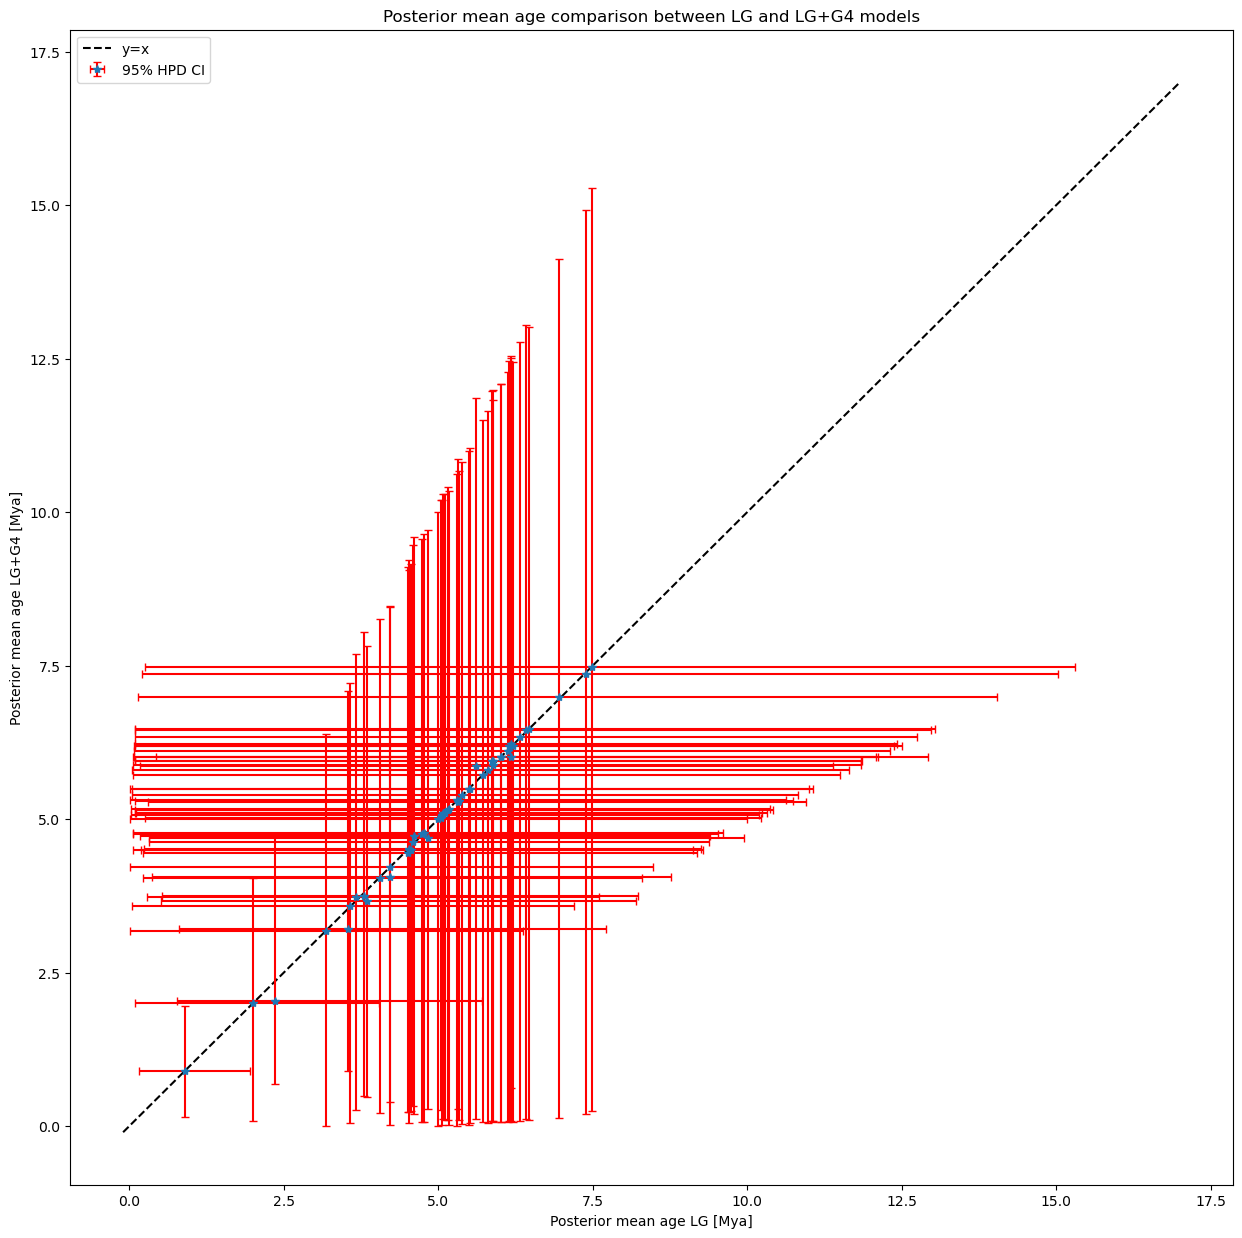

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4.png')

In [24]:
posterior_mean_baseml

[7.4911,
 7.3964,
 6.9498,
 6.4699,
 6.3265,
 6.1441,
 5.8753,
 3.8412,
 5.16,
 4.5272,
 4.2181,
 3.5757,
 3.1836,
 1.9962,
 0.9026,
 4.502,
 6.1696,
 5.6121,
 5.8873,
 5.0402,
 4.59,
 5.0676,
 6.2106,
 6.0191,
 5.8889,
 5.7199,
 5.5053,
 5.3881,
 5.1681,
 4.9932,
 4.7366,
 4.0586,
 3.6735,
 5.1133,
 4.5308,
 6.12,
 2.3637,
 6.0107,
 5.7972,
 5.4903,
 5.3047,
 4.5604,
 4.7632,
 5.3275,
 5.0688,
 4.6125,
 4.2131,
 4.8278,
 6.4171,
 5.3121,
 3.7973,
 3.5464,
 6.1761]

In [25]:
posterior_mean_iqtree

[7.4776,
 7.3591,
 6.9865,
 6.4652,
 6.3431,
 6.1865,
 5.9429,
 3.6734,
 5.1553,
 4.4956,
 4.2176,
 3.5816,
 3.1836,
 1.9966,
 0.9013,
 4.4509,
 6.2271,
 5.8647,
 5.9527,
 5.0205,
 4.619,
 5.0681,
 6.1879,
 6.0074,
 5.8765,
 5.7177,
 5.4938,
 5.3855,
 5.1574,
 4.9935,
 4.7569,
 4.0383,
 3.7284,
 5.1009,
 4.5098,
 6.1052,
 2.0361,
 6.0099,
 5.7977,
 5.4872,
 5.3055,
 4.4894,
 4.7751,
 5.2878,
 5.0958,
 4.7187,
 4.0621,
 4.6983,
 6.4551,
 5.2802,
 3.7446,
 3.2149,
 6.0113]

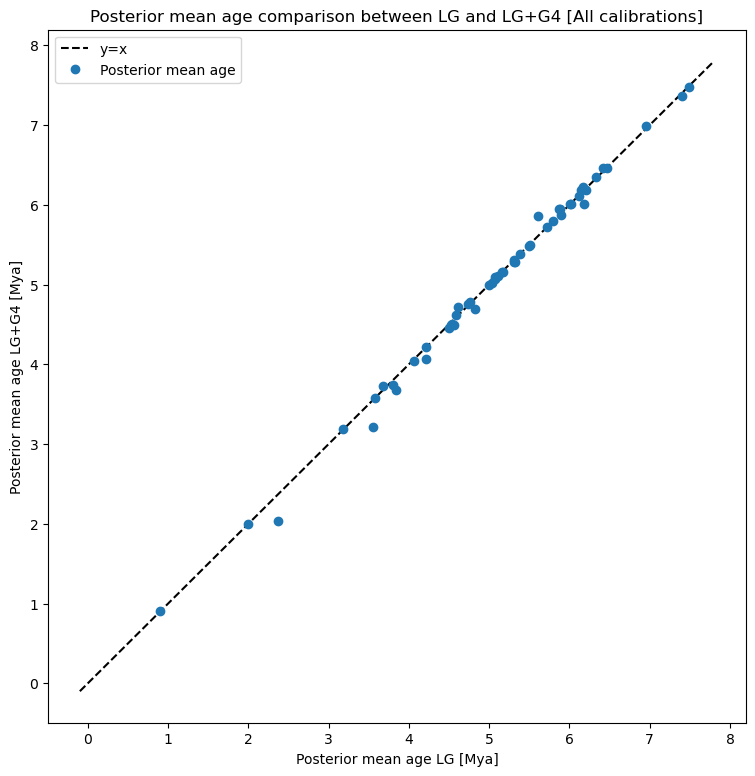

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.8], 
        [-0.1, 7.8], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_scatter.png')